In [6]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, TimeDistributed, LSTM, GlobalAvgPool2D, AbstractRNNCell, MaxPooling2D, RNN
import numpy as np
import matplotlib.pyplot as plt
import datetime
import tqdm

# magic line only needed in jupyter notebooks!
%reload_ext tensorboard

In [14]:
def load_mnist_dataset(noise_factor):
  # Load the MNIST dataset
  (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

  # Convert the images to float32 and normalize them
  x_train, x_test = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0

  # Add a third dimension to the images
  x_train = tf.expand_dims(x_train, axis=-1)
  x_test = tf.expand_dims(x_test, axis=-1)

  # Create a random noise tensor
  noise = noise_factor * tf.random.normal(shape=tf.shape(x_train))

  # Add the noise to the images
  x_train_noisy = x_train + noise
  x_train_noisy = tf.clip_by_value(x_train_noisy, 0, 1)

  noise = noise_factor * tf.random.normal(shape=tf.shape(x_test))
  x_test_noisy = x_test + noise
  x_test_noisy = tf.clip_by_value(x_test_noisy, 0, 1)

  # Construct a tf.data.Dataset for training and testing
  batch_size = 32
  train_dataset = tf.data.Dataset.from_tensor_slices((x_train_noisy, x_train)).shuffle(10000).batch(batch_size)
  test_dataset = tf.data.Dataset.from_tensor_slices((x_test_noisy, x_test)).batch(batch_size)

  # Use prefetch to improve the performance of the data pipeline
  train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)
  test_dataset = test_dataset.prefetch(tf.data.experimental.AUTOTUNE)

  return train_dataset, test_dataset


In [15]:
noise_factor = 0.5
train_dataset, test_dataset = load_mnist_dataset(noise_factor)

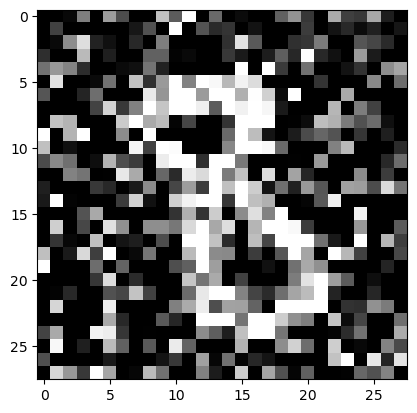

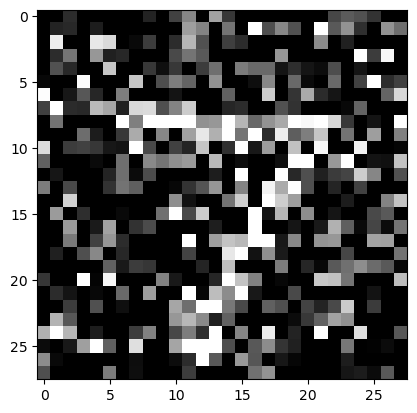

In [16]:
def print_noisy_image(dataset):
  # Get an image and its label from the dataset
  image, label = next(iter(dataset))

  # Get the first image from the batch
  image = image[0]

  # Remove the extra dimension
  image = tf.squeeze(image, axis=-1)

  # Plot the image
  plt.imshow(image, cmap='gray')
  plt.show()

# Print an image from the train_dataset
print_noisy_image(train_dataset)

# Print an image from the test_dataset
print_noisy_image(test_dataset)
